<IPython.core.display.Javascript object>


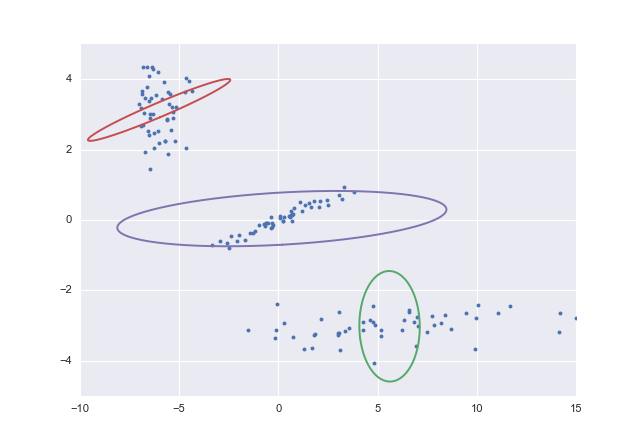

In [2]:
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt  # , mpld3
%matplotlib notebook

# Generate random sample, 3 components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
D = np.array([[4., 0.1], [1., .4]])
n_samples=50
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
          np.dot(np.random.randn(n_samples, 2), D) + np.array([6, -3])]

# Fit a Gaussian mixture with EM using five components
gmm = GaussianMixture(n_components=3, covariance_type='full', n_init=2).fit(X)

preds = gmm.predict(X)
probs = gmm.predict_proba(X)

covs = gmm.covariances_
means = gmm.means_

plt.figure()
plt.plot(X[:,0], X[:,1], '.')
for n_comp in range(len(covs)):
    cov = covs[n_comp]
    mean = means[n_comp]
    v, w = np.linalg.eigh(cov)
    e0 = w[0] / np.linalg.norm(w[0])
    e1 = w[1] / np.linalg.norm(w[1])
    t = np.linspace(0, 2 * np.pi, 10000)
    # 4.605 corresponds to 90% quantile:
    a = (mean[0]
         + np.sqrt(4.605 * v[0]) * np.cos(t) * e0[0]
         + np.sqrt(4.605 * v[1]) * np.sin(t) * e1[0])
    b = (mean[1]
         + np.sqrt(4.605 * v[0]) * np.cos(t) * e0[1]
         + np.sqrt(4.605 * v[1]) * np.sin(t) * e1[1])


    plt.plot(a, b)  # , color=color_key[n_comp])


In [6]:
np.linalg.inv(covs[0])

array([[ 1.98575262,  0.02748336],
       [ 0.02748336,  1.86781976]])

In [9]:
gmm.precisions_[1]

array([[ 1.98575262,  0.02748336],
       [ 0.02748336,  1.86781976]])